In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('winequality.csv')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
df.shape

(1599, 12)

In [9]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [59]:
for col in df.columns:
  if df[col].isnull().sum() > 0:
    df[col] = df[col].fillna(df[col].mean())

  df.isnull().sum().sum()

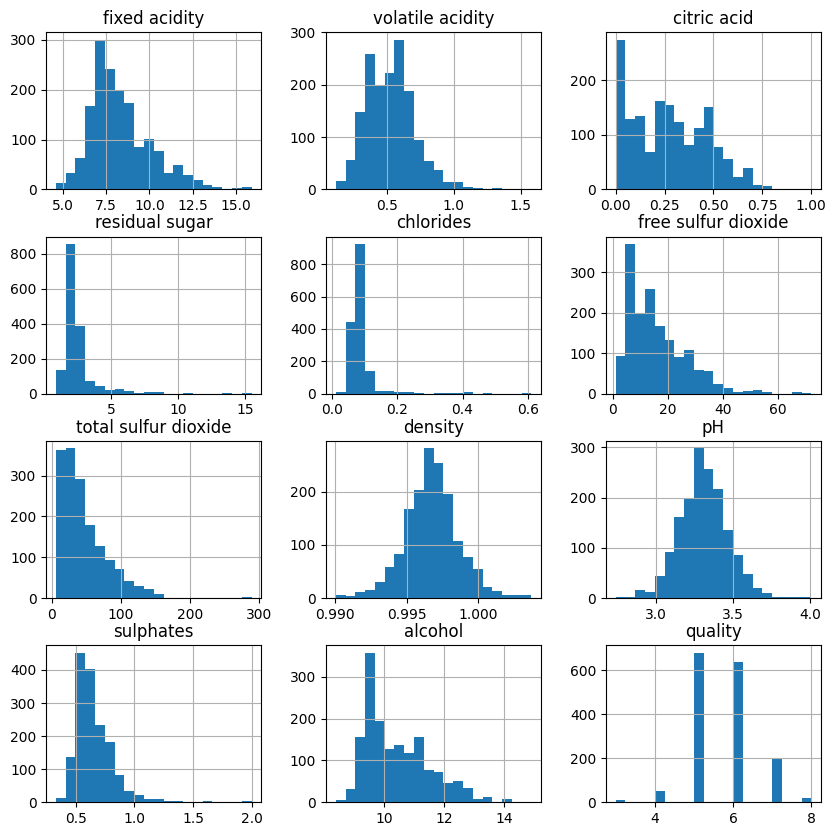

In [12]:
df.hist(bins=20, figsize=(10, 10))
plt.show()


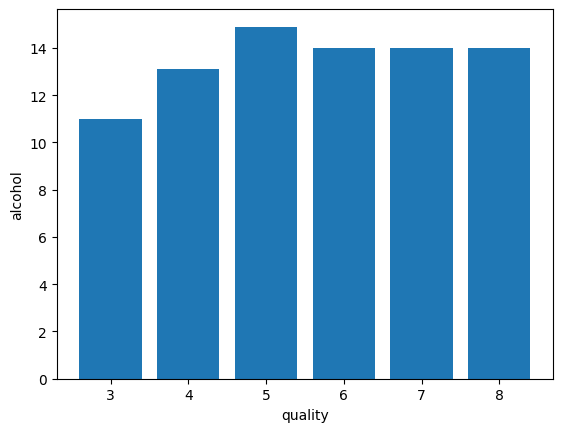

In [13]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()


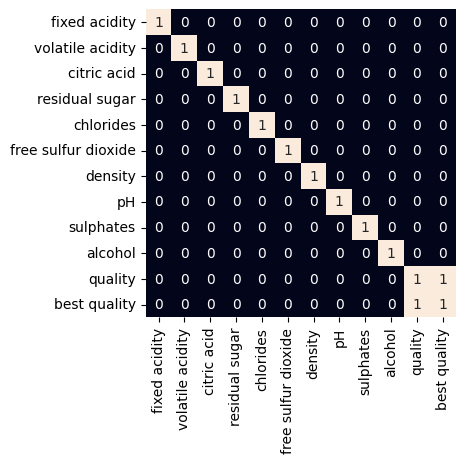

In [48]:
plt.figure(figsize=(4, 4))
sb.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()


<Axes: >

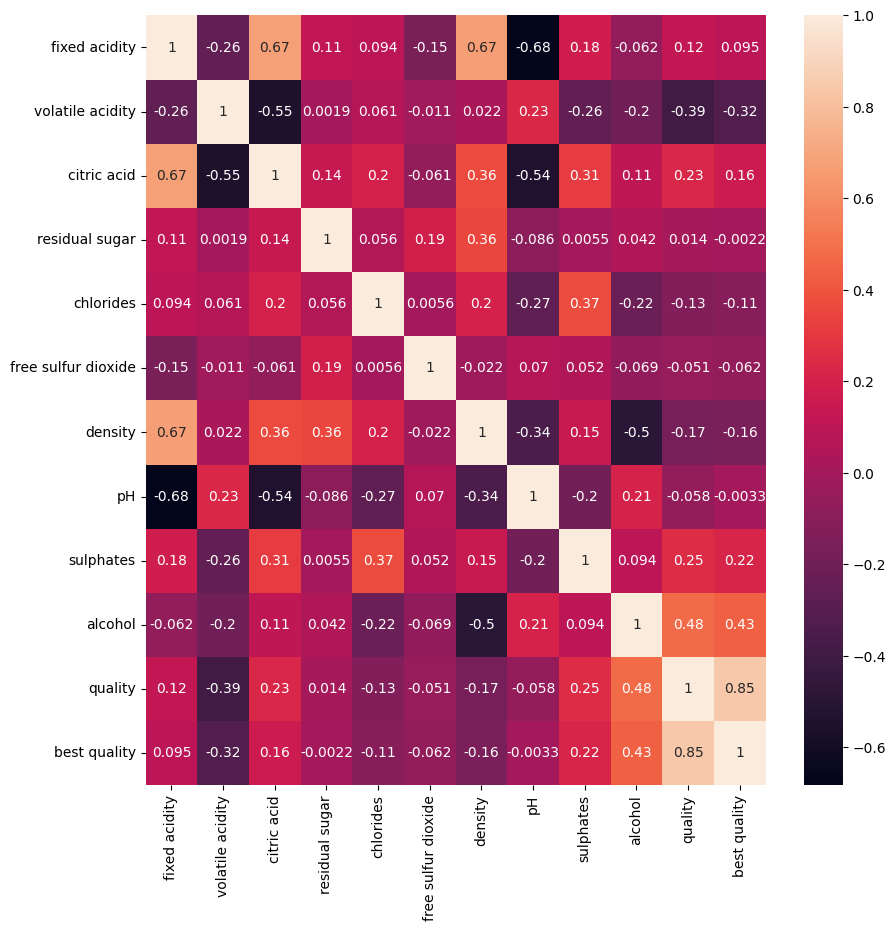

In [52]:
plt.figure(figsize=[10,10],)
sb.heatmap(df.corr(),annot=True)

Text(0, 0.5, 'alcohol')

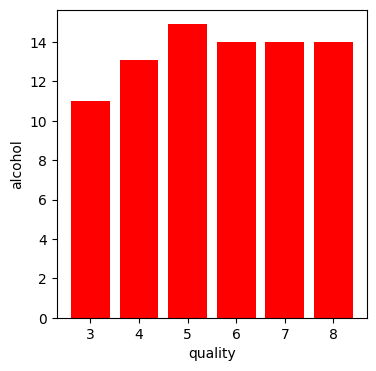

In [47]:
plt.figure(figsize=[4,4])
# plot bar graph
plt.bar(df['quality'],df['alcohol'],color='red')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

In [53]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name = df.corr().columns[a]
            print(name)

best quality


Here we write a python program with that we find those features whose correlation number is high, as you see in the program we set the correlation number greater than 0.7 it means if any feature has a correlation value above 0.7 then it was considered as a fully correlated feature, at last, we find the feature total sulfur dioxide which satisfy the condition.

So, we drop that feature

In [62]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5,0


In [64]:
df.isnull().sum()

fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
best quality           0
dtype: int64

In [66]:
next_df = pd.get_dummies(df,drop_first=True)
# display new dataframe
next_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5,0


In [71]:
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

Proportion of Good vs Bad Wines

In [73]:
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

#Preparing Data for Modelling
Standardizing Feature Variables

In [74]:
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

#Split data

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

##Using Various Classifiers

In [76]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.94      0.92      0.93       355
           1       0.47      0.56      0.51        45

    accuracy                           0.88       400
   macro avg       0.71      0.74      0.72       400
weighted avg       0.89      0.88      0.88       400



In [77]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       355
           1       0.68      0.60      0.64        45

    accuracy                           0.92       400
   macro avg       0.81      0.78      0.80       400
weighted avg       0.92      0.92      0.92       400



In [78]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       355
           1       0.47      0.51      0.49        45

    accuracy                           0.88       400
   macro avg       0.70      0.72      0.71       400
weighted avg       0.88      0.88      0.88       400



In [79]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))


              precision    recall  f1-score   support

           0       0.93      0.94      0.94       355
           1       0.51      0.47      0.49        45

    accuracy                           0.89       400
   macro avg       0.72      0.71      0.71       400
weighted avg       0.89      0.89      0.89       400



In [80]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       355
           1       0.62      0.69      0.65        45

    accuracy                           0.92       400
   macro avg       0.79      0.82      0.80       400
weighted avg       0.92      0.92      0.92       400



**By comparing the five models, the random forest and XGBoost seems to yield the highest level of accuracy. However, since XGBoost has a better f1-score for predicting good quality wines (1), I’m concluding that the XGBoost is the winner of the five models.**

Feature Importance using Random Forest

<Axes: >

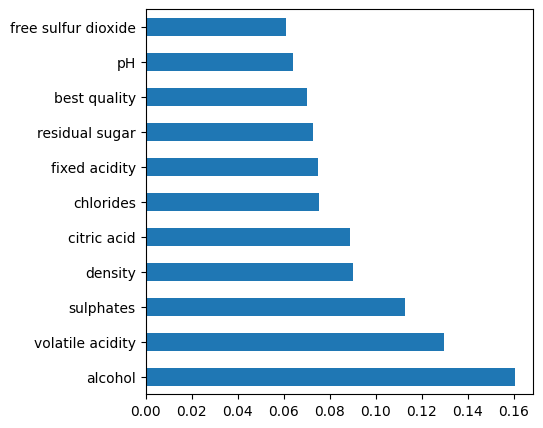

In [88]:
feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(5,5))

Feature Importance using XGBoost

<Axes: >

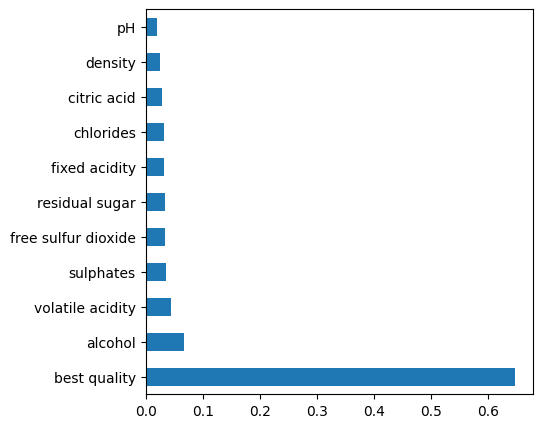

In [89]:
feat_importances = pd.Series(model5.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(5,5))

In [87]:
# Filtering df for only good quality
df_temp = df[df['goodquality']==1]
df_temp.describe()
# Filtering df for only bad quality
df_temp2 = df[df['goodquality']==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality,goodquality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.0
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,0.996859,3.314616,0.644754,10.251037,5.408828,0.461650,0.0
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,0.001808,0.154135,0.170629,0.969664,0.601719,0.498708,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000,0.0
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,0.995785,3.210000,0.540000,9.500000,5.000000,0.000000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,0.996800,3.310000,0.600000,10.000000,5.000000,0.000000,0.0
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,0.997900,3.410000,0.700000,10.900000,6.000000,1.000000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,1.003690,4.010000,2.000000,14.900000,6.000000,1.000000,0.0


###By looking into the details, we can see that good quality wines have higher levels of alcohol on average, have a lower volatile acidity on average, higher levels of sulphates on average, and higher levels of residual sugar on average.